## Reading data

In [73]:
def read_data(filename):

    net={}

    harta = []

    with open(filename, "r") as f:

        nr_noduri = int(f.readline().strip())

        for i in range(0, nr_noduri):

            linie = []

            buffer = f.readline().strip().split(",")
            #print(buffer)

            for el in buffer:
                linie.append(int(el))

            harta.append(linie)

    net['noNodes']=nr_noduri
    net['mat']=harta

    return net



## Warm up

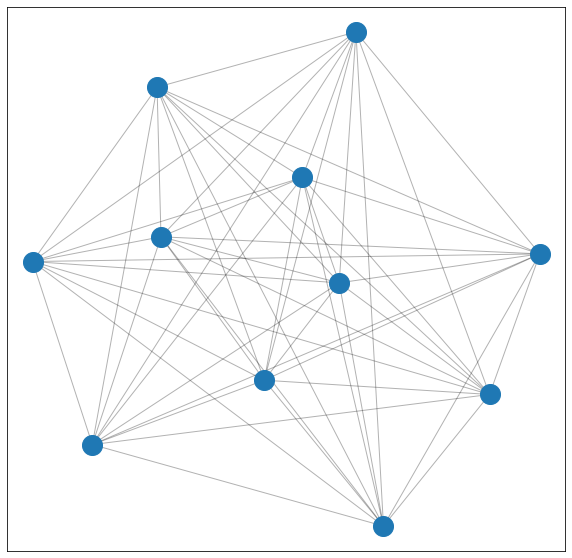

In [74]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
import warnings 

warnings.simplefilter('ignore')

network=read_data('hard_tsp.txt')


A=np.matrix(network["mat"])
G=nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(10, 10))  # image is 8 x 8 inches 
nx.draw_networkx_nodes(G, pos, node_size=400, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

## Fitness function

In [75]:
def routeLength(harta, solution):
    the_length = 0

    for index in range(0, len(solution)):
        the_length = the_length + harta[solution[index - 1]][solution[index]]

    return the_length

Testing


In [76]:
from Chromosome import Chromosome
problParam= {'noNodes' : network['noNodes'], 'function' : routeLength, 'network' : network }

'''cromo=Chromosome(problParam)
cromo.repres=[8, 4, 7, 3, 6, 2, 5, 1, 9,0]
cromo2=Chromosome(problParam)
cromo2.repres=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print(cromo.crossover(cromo2))'''

#cromo3=Chromosome(problParam)
#cromo3.repres=[0,1,2,3,4,5,6,7]

#cromo3.mutation()

#print(cromo3)


'cromo=Chromosome(problParam)\ncromo.repres=[8, 4, 7, 3, 6, 2, 5, 1, 9,0]\ncromo2=Chromosome(problParam)\ncromo2.repres=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]\n\nprint(cromo.crossover(cromo2))'

## Spin to win

In [77]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math
import numpy as np 
from GA import GA


gaParam = {'popSize' : 200, 'noGen' : 1000, 'pm' : 0}

problParam= {'noNodes' : network['noNodes'], 'function' : routeLength, 'network' : network }

ga = GA(gaParam, problParam)
ga.initialisation()
ga.evaluation()

all_time_best=[]
all_time_best_fitness=1000000000000000

allBestFitnesses = []
allAvgFitnesses = []
generations = []

for g in range(gaParam['noGen']):

    #logic alg
    #ga.oneGeneration()
    ga.oneGenerationElitism()
    #ga.oneGenerationSteadyState()
    
    bestChromo = ga.bestChromosome()
    if all_time_best_fitness> bestChromo.fitness:
        all_time_best=bestChromo.repres[:]
        all_time_best_fitness=bestChromo.fitness


    allPotentialSolutionsX = [c.repres for c in ga.population]
    allPotentialSolutionsY = [c.fitness for c in ga.population]
    bestSolX = ga.bestChromosome().repres
    bestSolY = ga.bestChromosome().fitness
    allBestFitnesses.append(bestSolY)
    allAvgFitnesses.append(sum(allPotentialSolutionsY) / len(allPotentialSolutionsY))
    generations.append(g)
    
'''
    print(bestChromo.repres)
    print(bestChromo.fitness)
'''


'\n    print(bestChromo.repres)\n    print(bestChromo.fitness)\n'

## Verdict

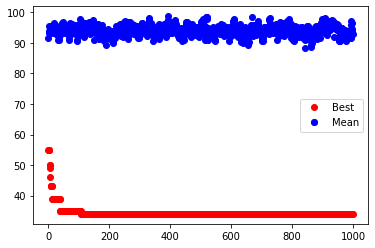

[0, 3, 4, 5, 8, 9, 1, 7, 2, 6, 10]
34


In [78]:
plt.ioff()
best, = plt.plot(generations, allBestFitnesses, 'ro', label = 'best')
mean, = plt.plot(generations, allAvgFitnesses, 'bo', label = 'mean')
plt.legend([best, (best, mean)], ['Best', 'Mean'])
plt.show()

print(all_time_best)
print(all_time_best_fitness)